# 0.0. IMPORTS

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

from IPython.display          import Image
from IPython.core.display     import HTML
from zlib                     import crc32
from sklearn.model_selection  import train_test_split, StratifiedShuffleSplit, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.impute           import SimpleImputer
from sklearn.preprocessing    import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.base             import BaseEstimator, TransformerMixin
from sklearn.pipeline         import Pipeline, FeatureUnion
from sklearn.compose          import ColumnTransformer
from sklearn.linear_model     import LinearRegression
from scipy.stats              import geom, expon, stats, randint 
from sklearn.svm              import SVR
from sklearn.ensemble         import RandomForestRegressor
from sklearn.tree             import DecisionTreeRegressor
from sklearn.metrics          import mean_absolute_error, mean_squared_error           

## 0.1. Helper functions

In [2]:
## Create a class to select numerical or categorical columns 
#class OldDataFrameSelector(BaseEstimator, TransformerMixin):
#    def __init__(self, attribute_names):
#        self.attribute_names = attribute_names
#    def fit(self, X, y=None):
#        return self
#    def transform(self, X):
#        return X[self.attribute_names].values
#
#
#def test_set_check(identifier, test_ratio, hash=hashlib.md5):
#    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
#
#
#def test_set_check(identifier, test_ratio, hash=hashlib.md5):
#    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio
#
#
#def income_cat_proportions(data):
#    return data["income_cat"].value_counts() / len(data)
#
#def test_set_check(identifier, test_ratio):
#    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
#
#def split_train_test_by_id(data, test_ratio, id_column):
#    ids = data[id_column]
#    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
#    return data.loc[~in_test_set], data.loc[in_test_set]
#
#
## For illustration only. Sklearn has train_test_split()
#def split_train_test(data, test_ratio):
#    shuffled_indices = np.random.permutation(len(data))
#    test_set_size = int(len(data) * test_ratio)
#    test_indices = shuffled_indices[:test_set_size]
#    train_indices = shuffled_indices[test_set_size:]
#    return data.iloc[train_indices], data.iloc[test_indices]

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    

In [3]:
jupyter_settings();

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Emanoel\anaconda3\envs\analise_de_dados\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['randint']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## 0.2. Loading data

In [4]:
df_housing_raw = pd.read_csv('../data/housing.csv', low_memory= False)

In [5]:
df_housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 1.0. DATA DESCRIPTION

In [6]:
df1 = df_housing_raw.copy()

## 1.1. Data dimensions

In [7]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 20640
Number of columns: 10


## 1.2. Data types

In [8]:
df1.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [9]:
df1.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## 1.3. Check NA

In [10]:
df1.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## 1.4. Filout NA

In [11]:
df1['total_bedrooms'] = df1['total_bedrooms'].apply( lambda x: 537.9 if math.isnan( x ) else x )

In [12]:
df1.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 1.5. Chenge data types

In [13]:
df1.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## 1.6. Descriptive statistics

In [14]:
num_attributes = df1.select_dtypes(include = ['float64'])
cat_attributes = df1.select_dtypes(exclude = ['float64'])

### 1.6.1. Numerical attributes

In [15]:
# medidas de tendência central - mean and median

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T


# medidas de dispersão - std, min, max, range, skew, kurtosis

md1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
md2 = pd.DataFrame( num_attributes.apply( min ) ).T 
md3 = pd.DataFrame( num_attributes.apply( max ) ).T 
md4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
md5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
md6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

#concatenar

medidas = pd.concat([ct1, ct2, md2, md3, md1, md4, md5, md6 ]).T.reset_index()
medidas.columns = ['attributes', 'mean', 'median', 'min', 'max', 'std', 'range', 'skew', 'kurtosis' ]

In [16]:
medidas

,attributes,mean,median,min,max,std,range,skew,kurtosis
0,longitude,-119.569704,-118.4900,-124.3500,-114.3100,2.003483,10.0400,-0.297801,-1.330152
1,latitude,35.631861,34.2600,32.5400,41.9500,2.135901,9.4100,0.465953,-1.117760
2,housing_median_age,28.639486,29.0000,1.0000,52.0000,12.585253,51.0000,0.060331,-0.800629
3,total_rooms,2635.763081,2127.0000,2.0000,39320.0000,2181.562402,39318.0000,4.147343,32.630927
4,total_bedrooms,537.870848,438.0000,1.0000,6445.0000,419.256436,6444.0000,3.477021,22.238633
5,population,1425.476744,1166.0000,3.0000,35682.0000,1132.434688,35679.0000,4.935858,73.553116
6,households,499.539680,409.0000,1.0000,6082.0000,382.320491,6081.0000,3.410438,22.057988
7,median_income,3.870671,3.5348,0.4999,15.0001,1.899776,14.5002,1.646657,4.952524
8,median_house_value,206855.816909,179700.0000,14999.0000,500001.0000,115392.820404,485002.0000,0.977763,0.327870


In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,537.870848,419.266592,1.0000,297.0000,438.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


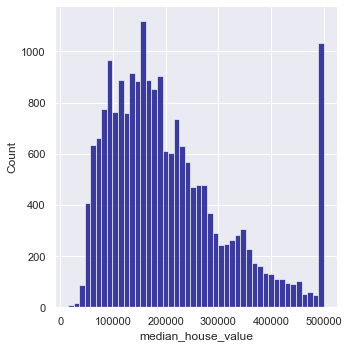

In [18]:
sns.displot( df1['median_house_value'], color='navy' );

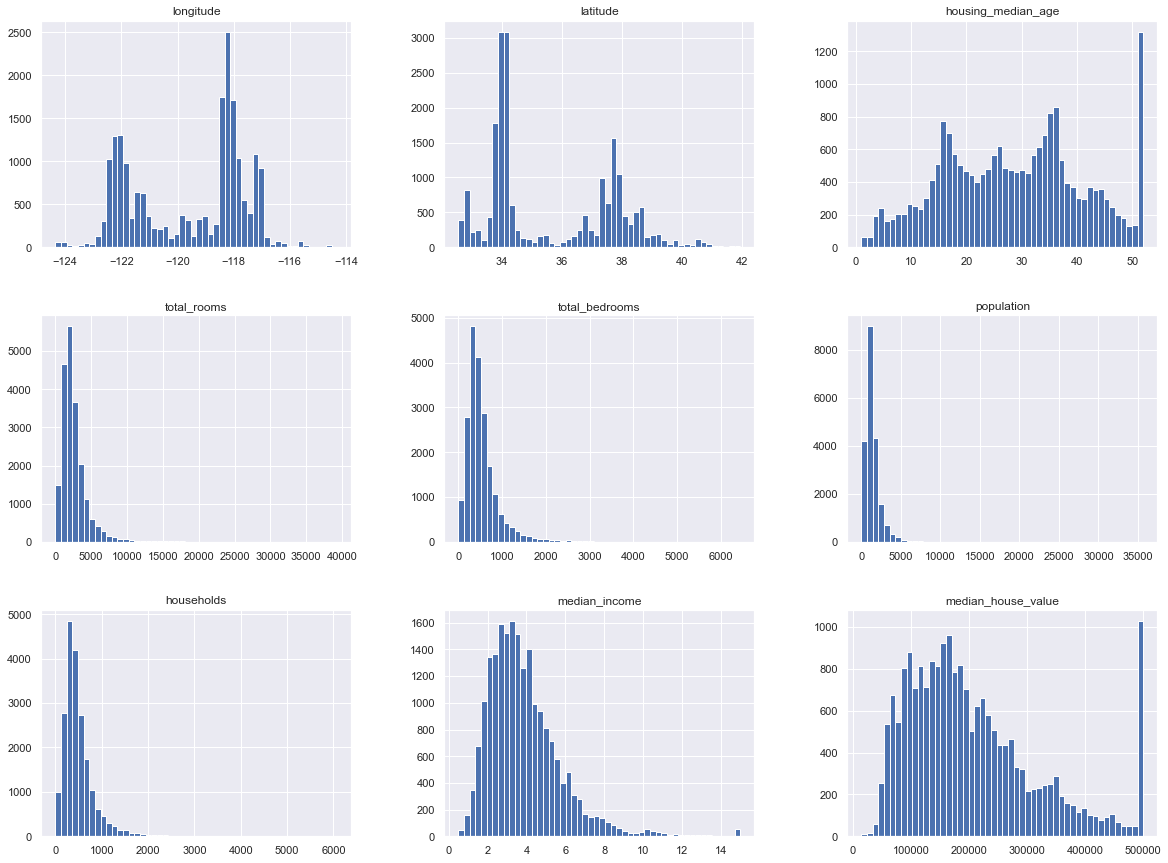

In [19]:
df1.hist(bins=50, figsize=(20, 15));

### 1.6.2. Categorical attributes

In [21]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

ocean_proximity    5
dtype: int64

In [20]:
cat_attributes.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

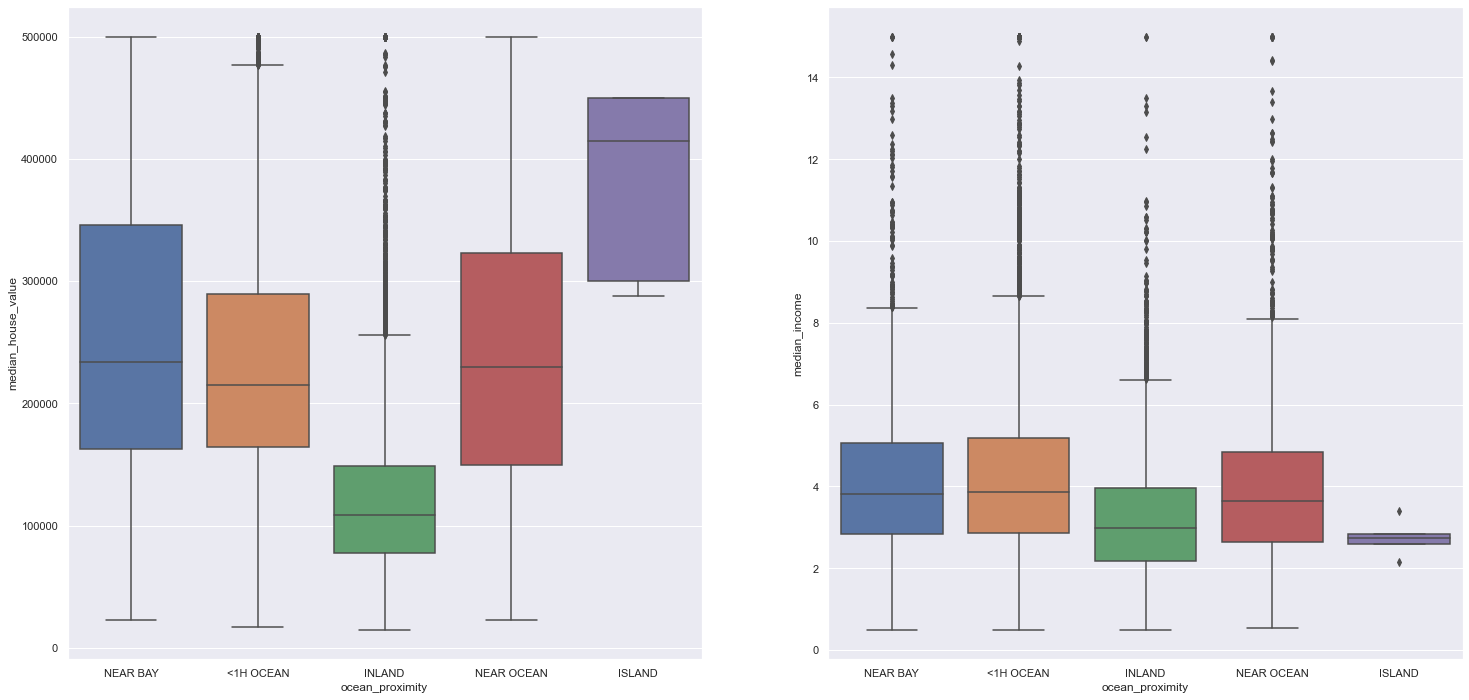

In [22]:
plt.subplot( 1, 2, 1 );
sns.boxplot( x='ocean_proximity', y='median_house_value', data=df1 );

plt.subplot( 1, 2, 2 );
sns.boxplot( x='ocean_proximity', y='median_income', data=df1 );


# 2.0. FEATURE ENGINEERING

In [23]:
df2 = df1.copy()

## 2.1. Mapa mental de hipóteses

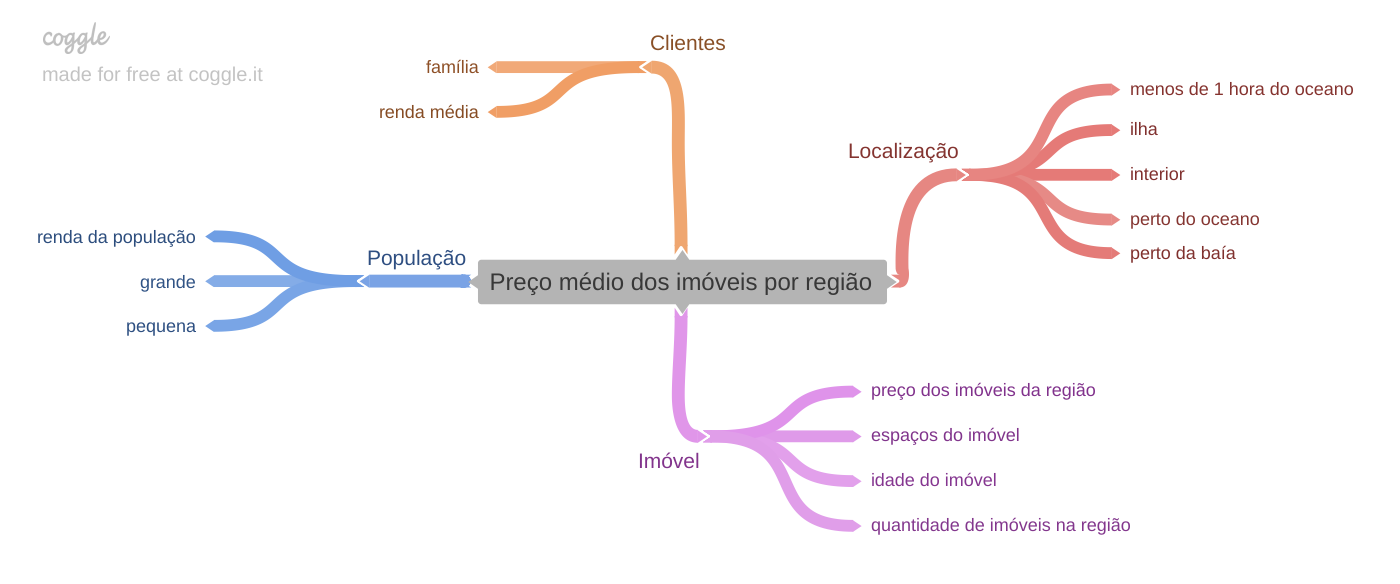

In [24]:
Image('../img/mind_map.png')

## 2.2. Criação das hipóteses

### 2.2.1.  Hipóteses clientes

**1.** Clientes com maior renda compram imóveis mais caros
</br>
**2.** Clientes com maiores famílias compram os maiores imóveis
</br>
**3.** Clientes que comparam imóveis no interior possuem maiores família
</br>
**4.** Clientes com maiores famíllias preferem imóveis com maior número de quartos
</br>
**5.** Clientes com maior renda compram imóveis menores
</br>
**6.** Clientes com maior renda compram imóveis mais novos
</br>
**7.** Clientes com menor renda compram mais antigos
</br>
**8.** Clientes com maiores famílias compram imóveis mais caros

### 2.2.2.  Hipóteses Localização 

**1.** Imóveis localizados à menos de 1 hora do oceano são mais vendidos  
</br>
**2.** Imóveis localizados em ilhas são costumam ser mais caros
</br>
**3.** Imóveis localizados no interior são mais baratos
</br>
**4.** Imóveis perto do oceano são vendidos para clientes com maior renda

### 2.2.3.  Hipóteses Imóveis

**1.** Imóveis à menos de 1 hora do oceano possuem menor número de cômodos
</br>
**2.** Imóveis à menos de 1 hora do oceano são mais caros
</br>
**3.** Imóveis no interior são comprados por cleintes que possuem menor renda
</br>
**4.** Imóveis localizados perto da baía costuma atrair clientes com maior renda
</br>
**5** Imóveis mais antigos são mais baratos
</br>
**6** Imóveis maiores possuem maior valor
</br>
**7** Imóveis menores costumam ser mais baratos 
</br>
**8** Imóveis mais caros são vendidos na ilha 
</br>
**9** Imóveis mais baratos são vendidos para maiores famílias

### 2.2.4.  Hipóteses População

**1.** Lugares mais populosos possuem imóveis mais baratos
</br>
**2.** Lugares mais populosos possuem clientes com maiores renda
</br>
**3.** Lugares mais menos populosos possuem imóveis mais caros
</br>
**4.** Lugares menos populosos possuem clientes com maiores renda

### 2.2.4. Lista final de hipóteses

**1.** Clientes com maior renda compram imóveis mais caros
</br>
**2.** Clientes com maiores famílias compram imóveis mais baratos
</br>
**3.** Clientes com maior renda compram imóveis mais novos
</br>
**4.** Clientes com menor renda compram mais antigos
</br>
**5.** Imóveis localizados à menos de 1 hora do oceano são mais vendidos  
</br>
**6.** Imóveis mais baratos são vendidos para maiores famílias
</br>
**7.** Imóveis localizados em ilhas são costumam ser mais caros
</br>
**8.** Imóveis localizados no interior são mais baratos
</br>
**9.** Imóveis perto do oceano são vendidos para clientes com maior renda
</br>
**10.** Imóveis no interior são comprados por cleintes que possuem menor renda
</br>
**11.** Imóveis maiores possuem maior valor
</br>
**12.** Imóveis mais caros são vendidos na ilha 

## 2.3 Feature Engineering

In [25]:
df2.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


# 3.0. FILTRAGEM DE VARIÁVEIS

In [26]:
df3 = df2.copy()

## 3.1. Filrtagem das linhas

## 3.2. Seleção das colunas

In [30]:
df3.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6999,-118.04,33.96,37.0,1948.0,395.0,1163.0,379.0,3.225,154000.0,<1H OCEAN


In [32]:
cols_drop = ['longitude', 'latitude']
df3 = df3.drop(cols_drop, axis=1) 